In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#dfx = pd.read_csv('all_results.md.csv')
dfx = pd.read_csv('december2013_results_remaining.csv')
df = dfx[(dfx.document_field=='session') & (dfx.term_field=='track')]
df = df[df.num_query_terms==0]
df = df.groupby(['strgy']).mean()
len(dfx)

150

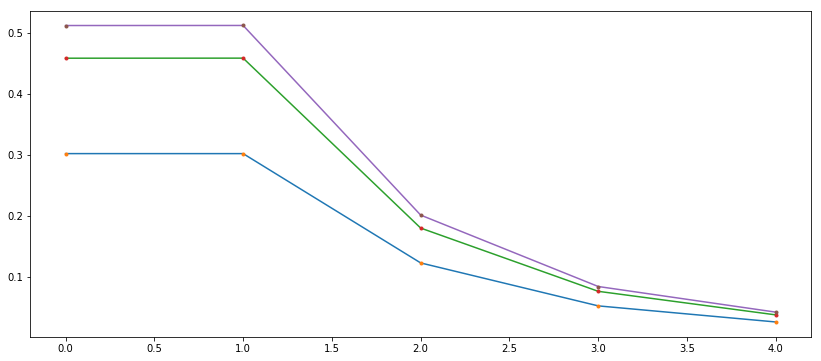

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(df.top1_acc)
plt.plot(df.top1_acc, '.')
plt.plot(df.index, df.top5_acc)
plt.plot(df.index, df.top5_acc, '.')
plt.plot(df.index, df.top10_acc)
plt.plot(df.index, df.top10_acc, '.')
plt.show()

In [20]:
df = dfx[(dfx.document_field=='user') & (dfx.term_field=='track')]
df = df[df.num_query_terms==0]
df = df.groupby(['strgy']).mean()

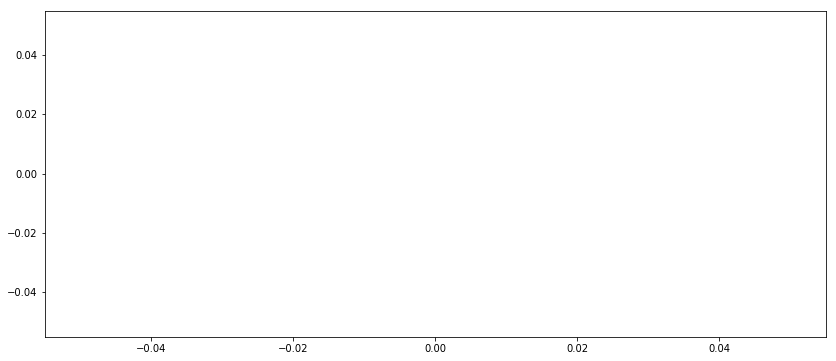

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(df.top1_acc)
plt.plot(df.top1_acc, '.')
plt.plot(df.index, df.top5_acc)
plt.plot(df.index, df.top5_acc, '.')
plt.plot(df.index, df.top10_acc)
plt.plot(df.index, df.top10_acc, '.')
plt.show()

In [22]:
df1 = dfx[(dfx.document_field=='session') & (dfx.term_field=='track')]
df1 = df1[df1.num_query_terms==0]
df1 = df1.groupby(['query_terms_ratio']).mean()

df2 = dfx[(dfx.document_field=='user') & (dfx.term_field=='track')]
df2 = df2[df2.num_query_terms==0]
df2 = df2.groupby(['query_terms_ratio']).mean()

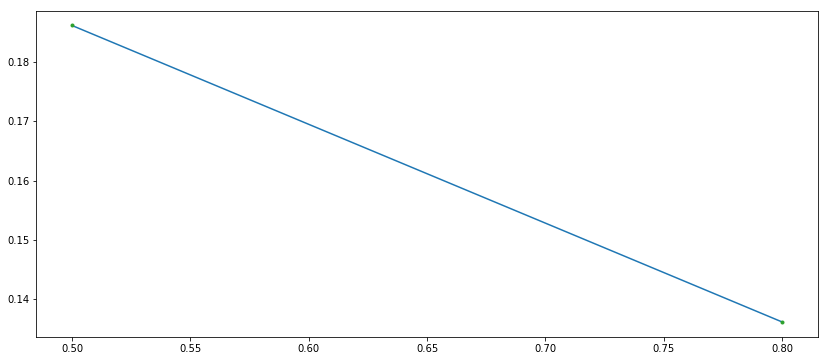

In [23]:
plt.figure(figsize=(14, 6))
plt.plot(df1.top1_acc)
plt.plot(df2.top1_acc)
plt.plot(df1.top1_acc, '.')
plt.plot(df2.top1_acc, '.')
plt.show()

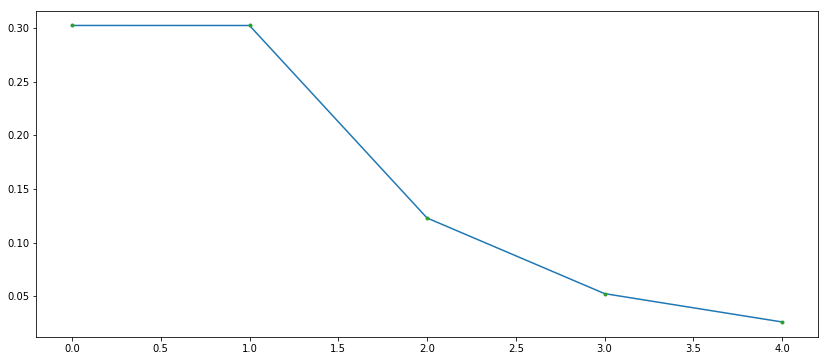

In [24]:
df1 = dfx[(dfx.document_field=='session') & (dfx.term_field=='track')]
df1 = df1[df1.num_query_terms==0]
df1 = df1.groupby(['strgy']).mean()

df2 = dfx[(dfx.document_field=='user') & (dfx.term_field=='track')]
df2 = df2[df2.num_query_terms==0]
df2 = df2.groupby(['strgy']).mean()

plt.figure(figsize=(14, 6))
plt.plot(df1.top1_acc)
plt.plot(df2.top1_acc)
plt.plot(df1.top1_acc, '.')
plt.plot(df2.top1_acc, '.')
plt.show()

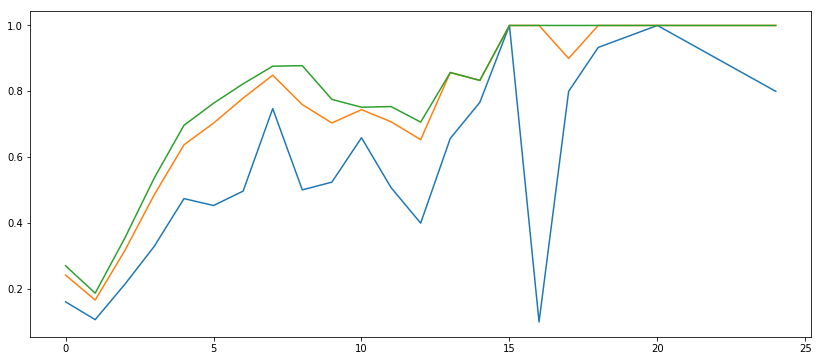

In [25]:
df1 = dfx[(dfx.document_field=='session') & (dfx.term_field=='track')]
df1 = df1.groupby(['num_query_terms']).mean()

df2 = dfx[(dfx.document_field=='user') & (dfx.term_field=='track')]
df2 = df2.groupby(['num_query_terms']).mean()

plt.figure(figsize=(14, 6))
plt.plot(df1.top1_acc)
plt.plot(df1.top5_acc)
plt.plot(df1.top10_acc)
plt.plot(df2.top1_acc)
plt.plot(df2.top5_acc)
plt.plot(df2.top10_acc)
plt.show()

In [26]:
df1 = dfx[(dfx.document_field=='session') & (dfx.term_field=='track')]
df1 = df1.groupby(['num_query_terms']).mean()
df1

,iter,strgy,top1_acc,top5_acc,top10_acc,num_train_documents,num_test_documents,query_terms_ratio
num_query_terms,,,,,,,,
0.0,1,2,0.161158,0.242388,0.270586,496791,124198,0.65
1.0,1,2,0.107058,0.166544,0.187483,496791,124198,0.65
2.0,1,2,0.214155,0.316469,0.354372,496791,124198,0.65
3.0,1,2,0.329914,0.486678,0.537611,496791,124198,0.65
4.0,1,2,0.474476,0.637673,0.696875,496791,124198,0.65
5.0,1,2,0.453524,0.703530,0.763983,496791,124198,0.65
6.0,1,2,0.497242,0.779501,0.822851,496791,124198,0.65
7.0,1,2,0.747636,0.849091,0.876364,496791,124198,0.65
8.0,1,2,0.500943,0.759748,0.877987,496791,124198,0.65


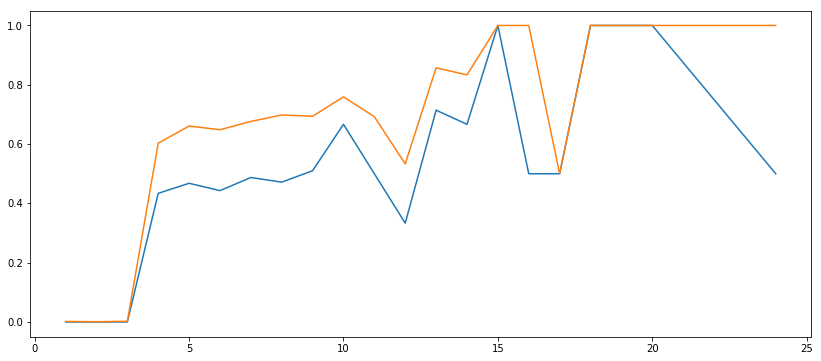

In [27]:
df1 = dfx[(dfx.document_field=='session') & (dfx.term_field=='track')]
df1 = df1[df1['query_terms_ratio']==0.5]
df1 = df1[df1.num_query_terms>0]
df1 = df1.groupby(['num_query_terms', 'strgy']).mean()
df1 = df1.reset_index()

plt.figure(figsize=(14, 6))
for i in [4]:
    plt.plot(df1[df1.strgy==i].num_query_terms, df1[df1.strgy==i].top1_acc)
    plt.plot(df1[df1.strgy==i].num_query_terms, df1[df1.strgy==i].top5_acc)
plt.show()

In [28]:
dfx.groupby(['document_field',  'num_query_terms', 'query_terms_ratio', 'strgy']).mean()

iter  top1_acc  \
document_field num_query_terms query_terms_ratio strgy                   
session        0.0             0.5               0         1  0.315093   
                                                 1         1  0.315044   
                                                 2         1  0.165994   
                                                 3         1  0.087141   
                                                 4         1  0.047287   
                               0.8               0         1  0.289569   
                                                 1         1  0.289569   
                                                 2         1  0.079744   
                                                 3         1  0.017564   
                                                 4         1  0.004576   
               1.0             0.5               0         1  0.272703   
                                                 1         1  0.272748   
                                                 2         1  0.000939   
                                                 3         1  0.000000   
                                                 4         1  0.000134   
                               0.8               0         1  0.261569   
                                                 1         1  0.261569   
                                                 2         1  0.000000   
                                                 3         1  0.000084   
                                                 4         1  0.000838   
               2.0             0.5               0         1  0.323769   
                                                 1         1  0.323565   
                                                 2         1  0.324685   
                                                 3         1  0.000000   
                                                 4         1  0.000204   
                               0.8               0         1  0.391176   
                                                 1         1  0.391176   
                                                 2         1  0.386975   
                                                 3         1  0.000000   
                                                 4         1  0.000000   
...                                                      ...       ...   
               15.0            0.5               0         1  1.000000   
                                                 1         1  1.000000   
                                                 2         1  1.000000   
                                                 3         1  1.000000   
                                                 4         1  1.000000   
               16.0            0.5               0         1  0.000000   
                                                 1         1  0.000000   
                                                 2         1  0.000000   
                                                 3         1  0.000000   
                                                 4         1  0.500000   
               17.0            0.5               0         1  1.000000   
                                                 1         1  1.000000   
                                                 2         1  1.000000   
                                                 3         1  0.500000   
                                                 4         1  0.500000   
               18.0            0.5               0         1  1.000000   
                                                 1         1  1.000000   
                                                 2         1  1.000000   
                                                 3         1  0.666667   
                                                 4         1  1.000000   
               20.0            0.5               0         1  1.000000   
                                                 1         1